In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [26]:
# loading the data from csv file to a Pandas DataFrame
customer_data = pd.read_csv('../data/Mall_Customers.csv')

In [27]:
# first 5 rows in the dataframe
customer_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
# Basic Data Info
print("\nData Information:")
print(customer_data.info())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


In [29]:
print("\nMissing Values:")
print(customer_data.isnull().sum())


Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [30]:
label_encoder = LabelEncoder()
customer_data['Gender'] = label_encoder.fit_transform(customer_data['Gender'])

In [31]:
customer_data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [32]:
# Descriptive statistics of the data
print("\nDescriptive Statistics:")
print(customer_data.describe())



Descriptive Statistics:
       CustomerID      Gender         Age  Annual Income (k$)  \
count  200.000000  200.000000  200.000000          200.000000   
mean   100.500000    0.440000   38.850000           60.560000   
std     57.879185    0.497633   13.969007           26.264721   
min      1.000000    0.000000   18.000000           15.000000   
25%     50.750000    0.000000   28.750000           41.500000   
50%    100.500000    0.000000   36.000000           61.500000   
75%    150.250000    1.000000   49.000000           78.000000   
max    200.000000    1.000000   70.000000          137.000000   

       Spending Score (1-100)  
count              200.000000  
mean                50.200000  
std                 25.823522  
min                  1.000000  
25%                 34.750000  
50%                 50.000000  
75%                 73.000000  
max                 99.000000  


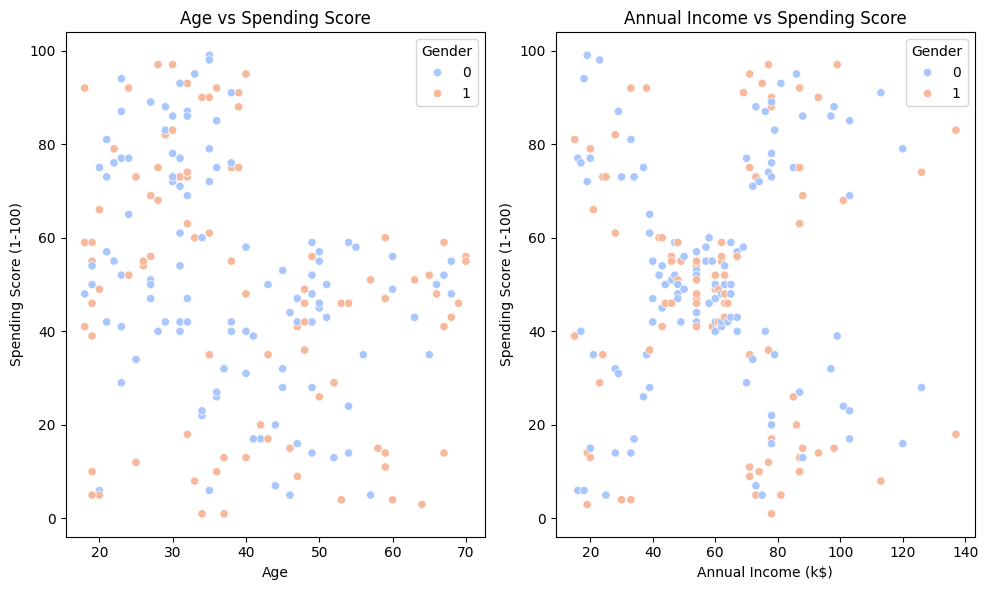

In [33]:
# Scatter plot to visualize relationships
plt.figure(figsize=(10, 6))

# Age vs Spending Score
plt.subplot(1, 2, 1)
sns.scatterplot(data=customer_data, x='Age', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Age vs Spending Score')

# Annual Income vs Spending Score
plt.subplot(1, 2, 2)
sns.scatterplot(data=customer_data, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='coolwarm')
plt.title('Annual Income vs Spending Score')

plt.tight_layout()
plt.show()



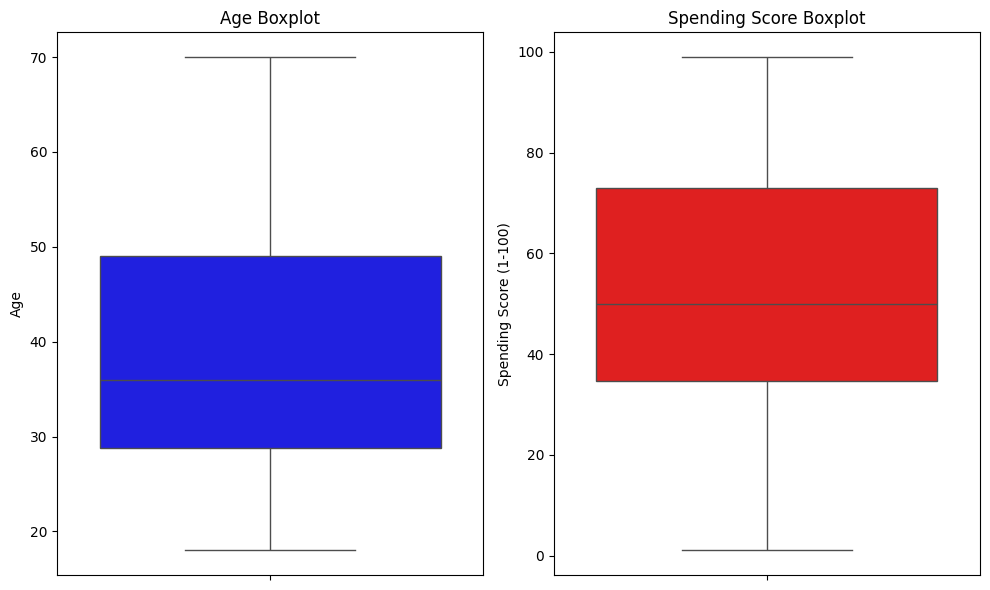

In [34]:
# Boxplot for checking outliers in Age and Spending Score
plt.figure(figsize=(10, 6))

# Age boxplot
plt.subplot(1, 2, 1)
sns.boxplot(customer_data['Age'], color='blue')
plt.title('Age Boxplot')

# Spending Score boxplot
plt.subplot(1, 2, 2)
sns.boxplot(customer_data['Spending Score (1-100)'], color='red')
plt.title('Spending Score Boxplot')

plt.tight_layout()
plt.show()



Gender Distribution:
Gender
0    112
1     88
Name: count, dtype: int64


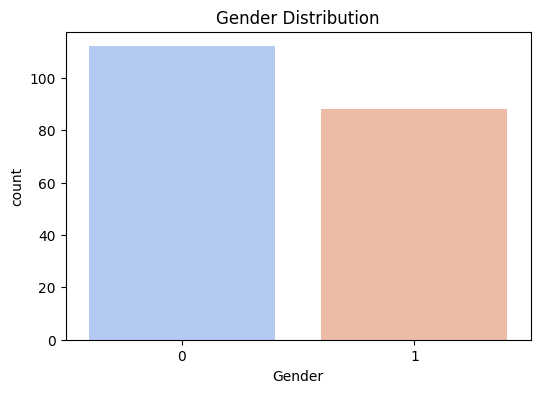

In [35]:
# Gender distribution
gender_counts = customer_data['Gender'].value_counts()
print("\nGender Distribution:")
print(gender_counts)

# Visualize Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=customer_data, palette='coolwarm')
plt.title('Gender Distribution')
plt.show()



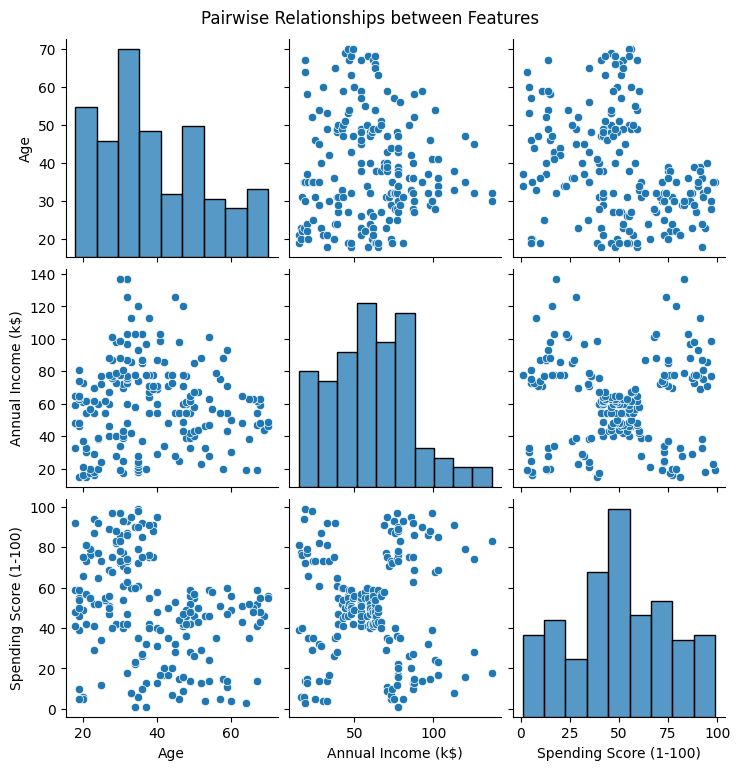

In [36]:

# Pairplot: Visualizing pairwise relationships between Age, Annual Income, and Spending Score
sns.pairplot(customer_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.suptitle('Pairwise Relationships between Features', y=1.02)
plt.show()



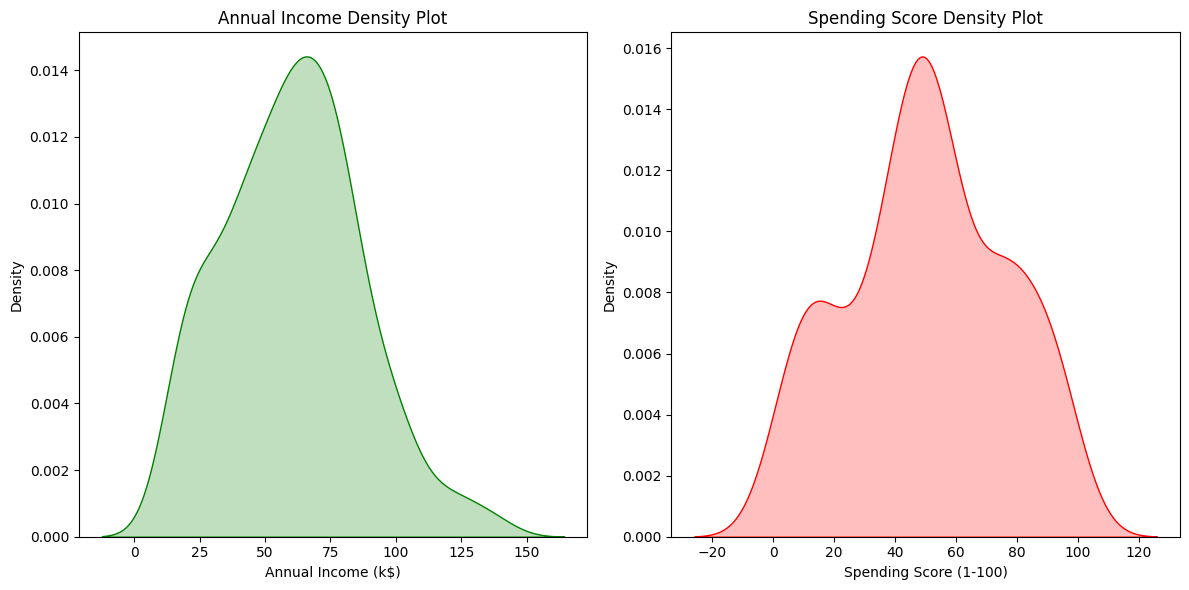

In [37]:
# Density Plot: Visualizing the distribution of Annual Income and Spending Score
plt.figure(figsize=(12, 6))

# Annual Income density plot
plt.subplot(1, 2, 1)
sns.kdeplot(customer_data['Annual Income (k$)'], shade=True, color='green')
plt.title('Annual Income Density Plot')

# Spending Score density plot
plt.subplot(1, 2, 2)
sns.kdeplot(customer_data['Spending Score (1-100)'], shade=True, color='red')
plt.title('Spending Score Density Plot')

plt.tight_layout()
plt.show()



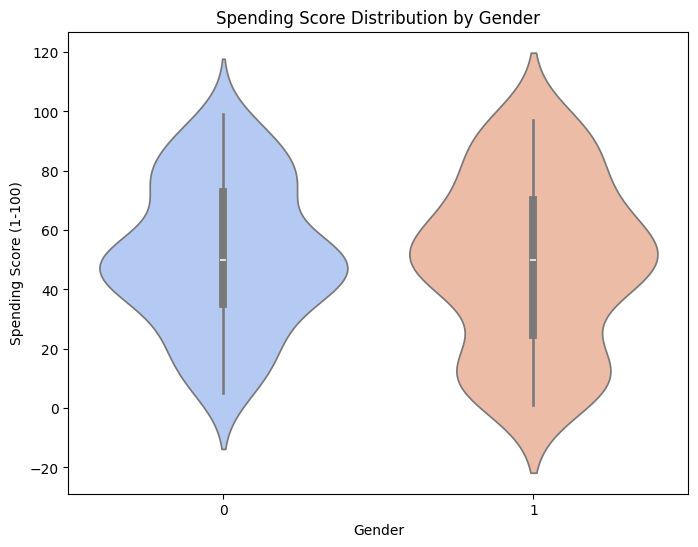

In [38]:
# Violin Plot: Distribution of Spending Score by Gender
plt.figure(figsize=(8, 6))
sns.violinplot(x='Gender', y='Spending Score (1-100)', data=customer_data, palette='coolwarm')
plt.title('Spending Score Distribution by Gender')
plt.show()



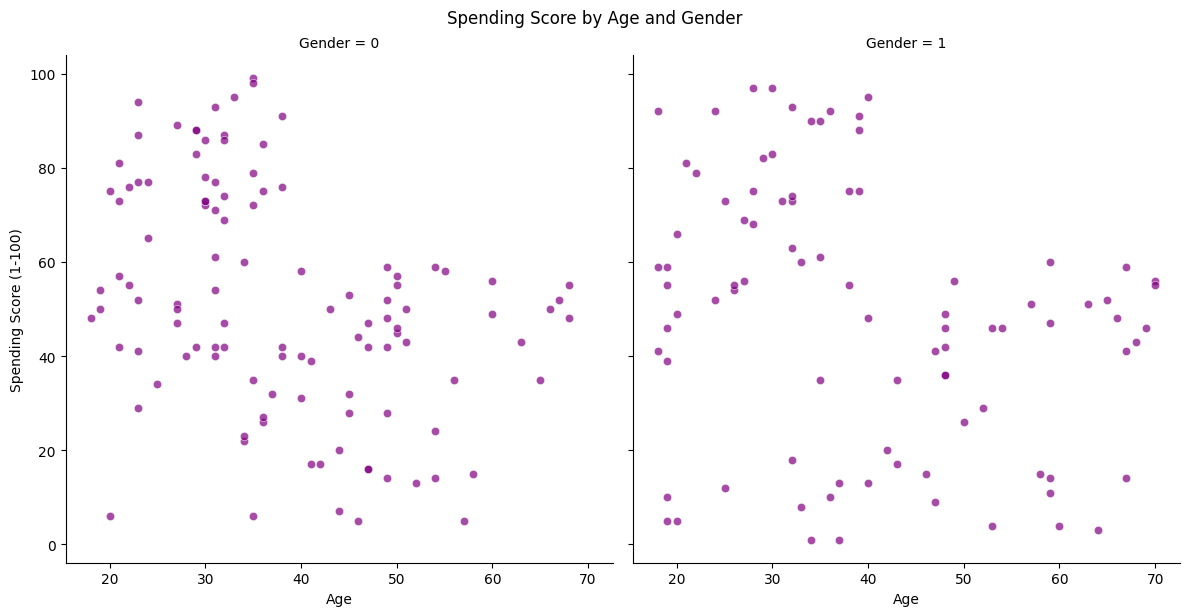

In [39]:
# FacetGrid: Visualizing Spending Score by Age and Annual Income
g = sns.FacetGrid(customer_data, col="Gender", height=6)
g.map(sns.scatterplot, 'Age', 'Spending Score (1-100)', alpha=.7, color='purple')
plt.suptitle('Spending Score by Age and Gender', y=1.02)
plt.show()

In [40]:
X = customer_data.iloc[:,[3,4]].values

In [41]:
print(X)

[[ 15  39]
 [ 15  81]
 [ 16   6]
 [ 16  77]
 [ 17  40]
 [ 17  76]
 [ 18   6]
 [ 18  94]
 [ 19   3]
 [ 19  72]
 [ 19  14]
 [ 19  99]
 [ 20  15]
 [ 20  77]
 [ 20  13]
 [ 20  79]
 [ 21  35]
 [ 21  66]
 [ 23  29]
 [ 23  98]
 [ 24  35]
 [ 24  73]
 [ 25   5]
 [ 25  73]
 [ 28  14]
 [ 28  82]
 [ 28  32]
 [ 28  61]
 [ 29  31]
 [ 29  87]
 [ 30   4]
 [ 30  73]
 [ 33   4]
 [ 33  92]
 [ 33  14]
 [ 33  81]
 [ 34  17]
 [ 34  73]
 [ 37  26]
 [ 37  75]
 [ 38  35]
 [ 38  92]
 [ 39  36]
 [ 39  61]
 [ 39  28]
 [ 39  65]
 [ 40  55]
 [ 40  47]
 [ 40  42]
 [ 40  42]
 [ 42  52]
 [ 42  60]
 [ 43  54]
 [ 43  60]
 [ 43  45]
 [ 43  41]
 [ 44  50]
 [ 44  46]
 [ 46  51]
 [ 46  46]
 [ 46  56]
 [ 46  55]
 [ 47  52]
 [ 47  59]
 [ 48  51]
 [ 48  59]
 [ 48  50]
 [ 48  48]
 [ 48  59]
 [ 48  47]
 [ 49  55]
 [ 49  42]
 [ 50  49]
 [ 50  56]
 [ 54  47]
 [ 54  54]
 [ 54  53]
 [ 54  48]
 [ 54  52]
 [ 54  42]
 [ 54  51]
 [ 54  55]
 [ 54  41]
 [ 54  44]
 [ 54  57]
 [ 54  46]
 [ 57  58]
 [ 57  55]
 [ 58  60]
 [ 58  46]
 [ 59  55]

In [48]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- 1. Tuning KMeans Hyperparameters ---

In [49]:
kmeans_params = {
    'n_clusters': [3, 4, 5, 6, 7, 8],
    'init': ['k-means++', 'random'],
    'max_iter': [300, 500],
    'n_init': [10, 20]
}

best_kmeans_score = -1
best_kmeans_model = None

# Hyperparameter tuning using GridSearchCV
for n_clusters in kmeans_params['n_clusters']:
    for init_method in kmeans_params['init']:
        for max_iter in kmeans_params['max_iter']:
            for n_init in kmeans_params['n_init']:
                kmeans = KMeans(n_clusters=n_clusters, init=init_method, max_iter=max_iter, n_init=n_init, random_state=42)
                kmeans.fit(X_scaled)
                score = silhouette_score(X_scaled, kmeans.labels_)
                
                if score > best_kmeans_score:
                    best_kmeans_score = score
                    best_kmeans_model = kmeans

print(f"Best KMeans Model - Silhouette Score: {best_kmeans_score}")
print(f"Best Parameters: n_clusters={best_kmeans_model.n_clusters}, init={best_kmeans_model.init}, max_iter={best_kmeans_model.max_iter}, n_init={best_kmeans_model.n_init}")

Best KMeans Model - Silhouette Score: 0.5546571631111091
Best Parameters: n_clusters=5, init=k-means++, max_iter=300, n_init=10


# --- 2. Tuning DBSCAN Hyperparameters ---

In [50]:
dbscan_params = {
    'eps': [0.3, 0.4, 0.5, 0.6, 0.7],
    'min_samples': [3, 4, 5, 6]
}

best_dbscan_score = -1
best_dbscan_model = None

# Hyperparameter tuning for DBSCAN
for eps in dbscan_params['eps']:
    for min_samples in dbscan_params['min_samples']:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        dbscan_labels = dbscan.fit_predict(X_scaled)
        
        # We can calculate silhouette score only if the algorithm returns more than 1 cluster
        if len(set(dbscan_labels)) > 1:
            score = silhouette_score(X_scaled, dbscan_labels)
            
            if score > best_dbscan_score:
                best_dbscan_score = score
                best_dbscan_model = dbscan

print(f"Best DBSCAN Model - Silhouette Score: {best_dbscan_score}")
print(f"Best Parameters: eps={best_dbscan_model.eps}, min_samples={best_dbscan_model.min_samples}")


Best DBSCAN Model - Silhouette Score: 0.4248274189039687
Best Parameters: eps=0.7, min_samples=6


In [51]:
# --- 3. Tuning Hierarchical Clustering Hyperparameters ---

In [57]:
hierarchical_params = {
    'n_clusters': [3, 4, 5, 6],
    'linkage': ['ward', 'complete', 'single', 'average']
}

best_hierarchical_score = -1
best_hierarchical_model = None

# Hyperparameter tuning for Hierarchical Clustering
for n_clusters in hierarchical_params['n_clusters']:
    for linkage_method in hierarchical_params['linkage']:
        # Pass 'affinity' only if linkage is not 'ward'
    
        hierarchical = AgglomerativeClustering(n_clusters=n_clusters, linkage=linkage_method)
    

        hierarchical_labels = hierarchical.fit_predict(X_scaled)
        score = silhouette_score(X_scaled, hierarchical_labels)

        if score > best_hierarchical_score:
            best_hierarchical_score = score
            best_hierarchical_model = hierarchical

print(f"Best Hierarchical Clustering Model - Silhouette Score: {best_hierarchical_score}")
print(f"Best Parameters: n_clusters={best_hierarchical_model.n_clusters}, linkage={best_hierarchical_model.linkage}")


Best Hierarchical Clustering Model - Silhouette Score: 0.5538089226688662
Best Parameters: n_clusters=5, linkage=ward


# --- 4. Visualizing the Best Clusters ---

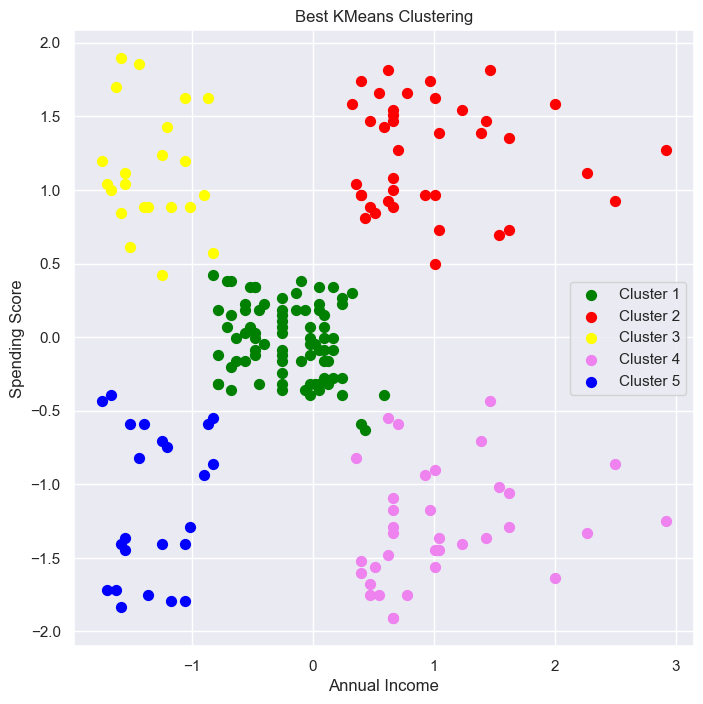

In [62]:
# KMeans Clustering Visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[best_kmeans_model.labels_ == 0, 0], X_scaled[best_kmeans_model.labels_ == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[best_kmeans_model.labels_ == 1, 0], X_scaled[best_kmeans_model.labels_ == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[best_kmeans_model.labels_ == 2, 0], X_scaled[best_kmeans_model.labels_ == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_scaled[best_kmeans_model.labels_ == 3, 0], X_scaled[best_kmeans_model.labels_ == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_scaled[best_kmeans_model.labels_ == 4, 0], X_scaled[best_kmeans_model.labels_ == 4, 1], s=50, c='blue', label='Cluster 5')
plt.title('Best KMeans Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

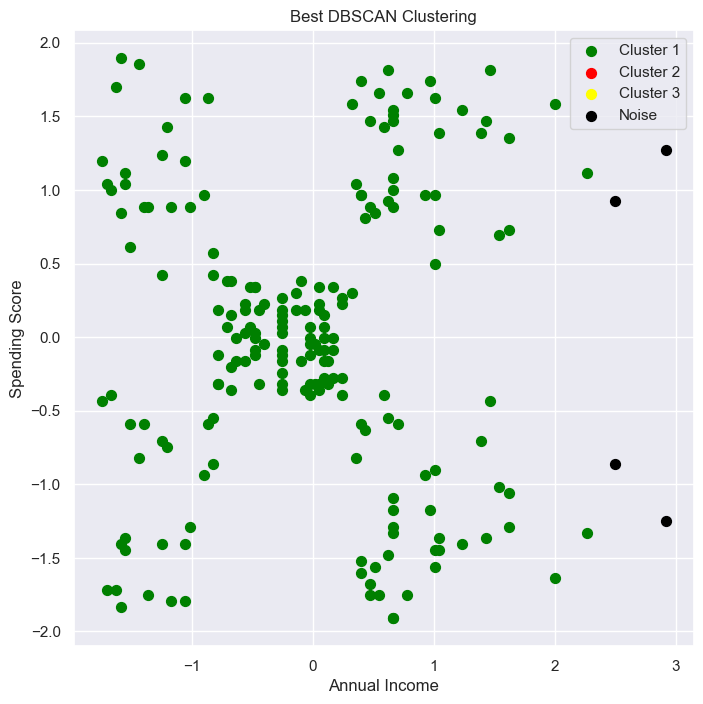

In [63]:
# DBSCAN Clustering Visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[best_dbscan_model.labels_ == 0, 0], X_scaled[best_dbscan_model.labels_ == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[best_dbscan_model.labels_ == 1, 0], X_scaled[best_dbscan_model.labels_ == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[best_dbscan_model.labels_ == 2, 0], X_scaled[best_dbscan_model.labels_ == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_scaled[best_dbscan_model.labels_ == -1, 0], X_scaled[best_dbscan_model.labels_ == -1, 1], s=50, c='black', label='Noise')
plt.title('Best DBSCAN Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()


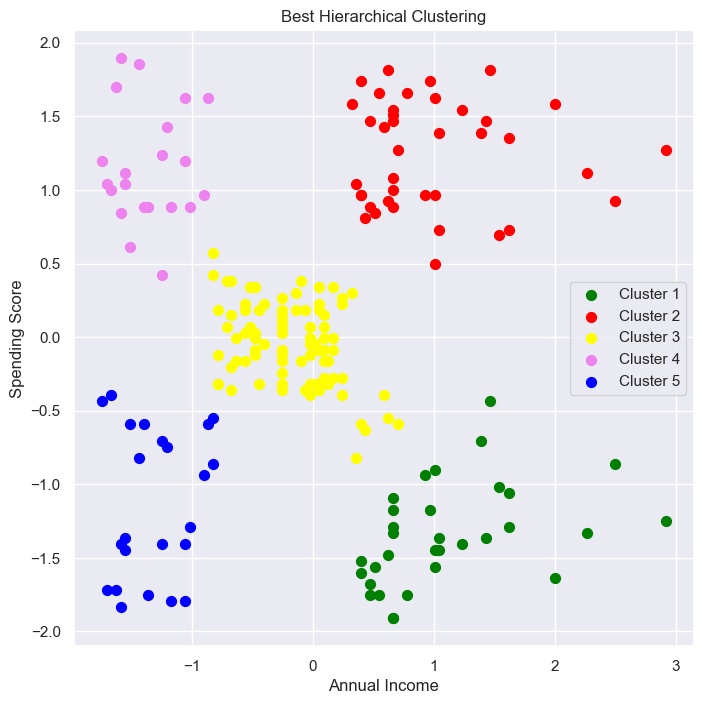

In [64]:
# Hierarchical Clustering Visualization
plt.figure(figsize=(8, 8))
plt.scatter(X_scaled[best_hierarchical_model.labels_ == 0, 0], X_scaled[best_hierarchical_model.labels_ == 0, 1], s=50, c='green', label='Cluster 1')
plt.scatter(X_scaled[best_hierarchical_model.labels_ == 1, 0], X_scaled[best_hierarchical_model.labels_ == 1, 1], s=50, c='red', label='Cluster 2')
plt.scatter(X_scaled[best_hierarchical_model.labels_ == 2, 0], X_scaled[best_hierarchical_model.labels_ == 2, 1], s=50, c='yellow', label='Cluster 3')
plt.scatter(X_scaled[best_hierarchical_model.labels_ == 3, 0], X_scaled[best_hierarchical_model.labels_ == 3, 1], s=50, c='violet', label='Cluster 4')
plt.scatter(X_scaled[best_hierarchical_model.labels_ == 4, 0], X_scaled[best_hierarchical_model.labels_ == 4, 1], s=50, c='blue', label='Cluster 5')
plt.title('Best Hierarchical Clustering')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()